In [3]:
%cd /Users/maayanlab/Documents/projects/human-melanoma-signature
import sys
sys.path.append('pipeline/scripts/')
import pandas as pd
import h5py
import numpy as np
import json, operator, math, requests
from geode_jupies import *
import sklearn.metrics.pairwise as smp
from scipy.spatial.distance import cosine
import seaborn as sns; sns.set(color_codes=True)
import RNAseq as RNA
from collections import Counter
import time

/Users/maayanlab/Documents/projects/human-melanoma-signature


/Users/maayanlab/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [35]:
%pwd

'/Users/maayanlab/Documents/projects/human-melanoma-signature'

In [4]:
from Melanoma import *

# Code Development for Melanoma Pipeline
## Define input and output files

In [13]:
# infiles
infile = 's4-enrichment.dir/melanoma-enrichr-results.txt'
infile2 = 's4-enrichment.dir/melanoma-all-top-FDR-log.txt'

In [59]:
# infiles
# infile = 's2-signatures.dir/melanoma-geneset-top.json'

In [4]:
# #infiles
# sig = 's2-signatures.dir/melanoma-signatures.txt'

In [5]:
# #infiles
# cpm = 's1-expression_data.dir/melanoma-cpm.txt'
# matches = 's2-expression_data.dir/melanoma-idmatches.txt'

In [7]:
# # Infile & outfile
# infiles = ['s1-expression_data.dir/melanoma-cpm.txt']
# outfile = 's1-expression_data.dir/melanoma-IDstatus.txt'

In [8]:
# # Infile & outfile
# infiles = ['rawdata/human_matrix.h5', 'rawdata/m2.csv']
# outfile = 's1-expression_data.dir/melanoma-cpm.txt'

### Test Code

In [23]:
all_top_log_df = pd.read_table(infile2, index_col='term_name')
# Unbiased variance over columns, take top 20 results
top_terms = all_top_log_df.var(axis=1).sort_values(ascending=False).index[:20]
n = 20

In [24]:
plot_df=all_top_log_df.copy()

In [25]:
plot_df

,1,11,15_a,15_b,15_c,17_a,17_b,17_c,18_a,18_b,...,19_b,19_c,19_d,2_a,2_b,2_c,3,5_a,5_b,5_c
term_name,,,,,,,,,,,,,,,,,,,,,
'de novo' posttranslational protein folding (GO:0051084),-0.000000,1.154713,0.645927,1.120324,0.316490,3.824583,1.923501,3.716450,0.470990,6.900810,...,-0.000000,0.310876,-0.000000,0.535998,0.340032,0.606662,0.980018,0.332147,0.542448,0.496968
2-oxoglutarate metabolic process (GO:0006103),-0.000000,-0.000000,-0.000000,-0.000000,0.769306,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.399424,-0.000000,-0.000000,0.401829
3'-UTR-mediated mRNA destabilization (GO:0061158),-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.520962,...,-0.000000,-0.000000,0.442146,-0.000000,-0.000000,-0.000000,-0.000000,0.474980,0.497236,-0.000000
3'-UTR-mediated mRNA stabilization (GO:0070935),-0.000000,0.444328,-0.000000,-0.000000,0.769306,-0.000000,0.452108,0.445844,-0.000000,-0.000000,...,-0.000000,-0.000000,0.399228,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.401829
3'-phosphoadenosine 5'-phosphosulfate biosynthetic process (GO:0050428),-0.000000,-0.000000,0.607130,0.591019,-0.000000,-0.000000,-0.000000,0.585248,0.463309,-0.000000,...,-0.000000,0.434289,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.467902
3'-phosphoadenosine 5'-phosphosulfate metabolic process (GO:0050427),-0.000000,-0.000000,0.393269,0.390332,-0.000000,-0.000000,-0.000000,0.377146,0.343560,-0.000000,...,-0.000000,0.337351,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.579685,0.369812,0.340993
4-hydroxyproline metabolic process (GO:0019471),-0.000000,-0.000000,0.585924,-0.000000,-0.000000,0.583661,-0.000000,0.557487,0.456814,0.545348,...,-0.000000,-0.000000,-0.000000,0.501969,-0.000000,0.546442,0.463565,-0.000000,-0.000000,1.090405
5S class rRNA transcription from RNA polymerase III type 1 promoter (GO:0042791),-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.498523,-0.000000,-0.000000
7-methylguanosine RNA capping (GO:0009452),-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.307002,-0.000000,...,0.443616,-0.000000,0.462845,1.529464,0.327784,0.327157,-0.000000,-0.000000,-0.000000,-0.000000


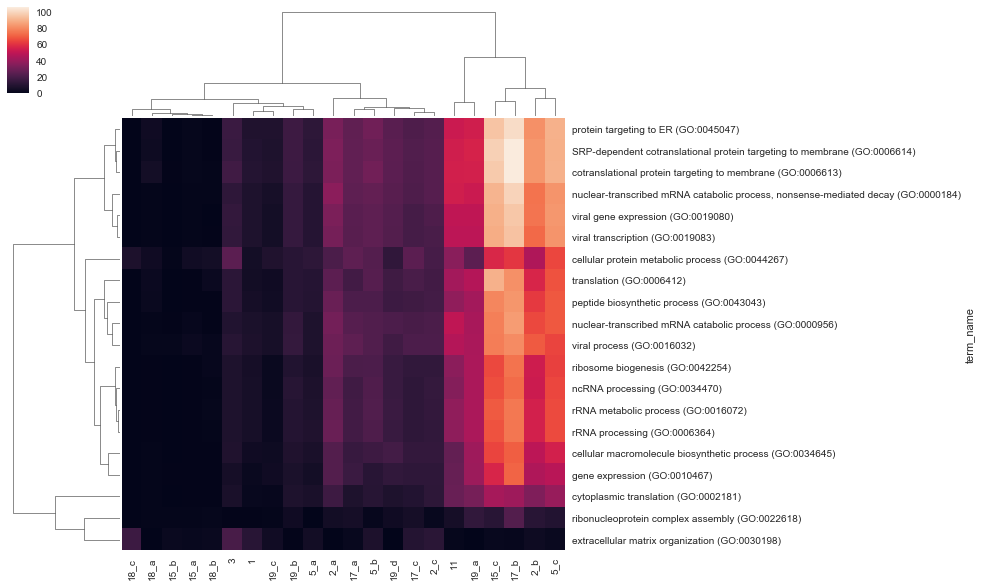

In [26]:
# Visualize with the seaborn package
sns.clustermap(plot_df.loc[top_terms])

In [6]:
enr_res_df = pd.read_table(infile)
# Select rows whose column value equals a scalar 'top'
all_top = enr_res_df.loc[enr_res_df['direction'] == 'top']

In [7]:
toptable= all_top.pivot(index='term_name', columns = 'signature',values='FDR').fillna(1)

In [12]:
#log 10 transformation
all_top_log = -np.log10(toptable)

In [302]:
mask = (all_top_log > 0.000001).sum(axis=1)
fdrs_filtered = all_top_log[mask<10]
fdrs_filtered

signature,1,11,15_a,15_b,15_c,17_a,17_b,17_c,18_a,18_b,...,19_b,19_c,19_d,2_a,2_b,2_c,3,5_a,5_b,5_c
term_name,,,,,,,,,,,,,,,,,,,,,
2-oxoglutarate metabolic process (GO:0006103),-0.000000,-0.000000,-0.000000,-0.000000,0.769306,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.399424,-0.000000,-0.000000,0.401829
3'-UTR-mediated mRNA destabilization (GO:0061158),-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.520962,...,-0.000000,-0.000000,0.442146,-0.000000,-0.000000,-0.000000,-0.000000,0.474980,0.497236,-0.000000
3'-UTR-mediated mRNA stabilization (GO:0070935),-0.000000,0.444328,-0.000000,-0.000000,0.769306,-0.000000,0.452108,0.445844,-0.000000,-0.000000,...,-0.000000,-0.000000,0.399228,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.401829
3'-phosphoadenosine 5'-phosphosulfate biosynthetic process (GO:0050428),-0.000000,-0.000000,0.607130,0.591019,-0.000000,-0.000000,-0.000000,0.585248,0.463309,-0.000000,...,-0.000000,0.434289,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.467902
3'-phosphoadenosine 5'-phosphosulfate metabolic process (GO:0050427),-0.000000,-0.000000,0.393269,0.390332,-0.000000,-0.000000,-0.000000,0.377146,0.343560,-0.000000,...,-0.000000,0.337351,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.579685,0.369812,0.340993
4-hydroxyproline metabolic process (GO:0019471),-0.000000,-0.000000,0.585924,-0.000000,-0.000000,0.583661,-0.000000,0.557487,0.456814,0.545348,...,-0.000000,-0.000000,-0.000000,0.501969,-0.000000,0.546442,0.463565,-0.000000,-0.000000,1.090405
5S class rRNA transcription from RNA polymerase III type 1 promoter (GO:0042791),-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.498523,-0.000000,-0.000000
7-methylguanosine RNA capping (GO:0009452),-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.307002,-0.000000,...,0.443616,-0.000000,0.462845,1.529464,0.327784,0.327157,-0.000000,-0.000000,-0.000000,-0.000000
7-methylguanosine mRNA capping (GO:0006370),-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.307002,-0.000000,...,0.443616,-0.000000,0.462845,1.529464,0.327784,0.327157,-0.000000,-0.000000,-0.000000,-0.000000


In [9]:
top_terms = all_top_log.var(axis=1).sort_values(ascending=False).index[:20]

In [10]:
n = 20
plot_df=all_top_log.copy()
# plot_df[plot_df > n] = n

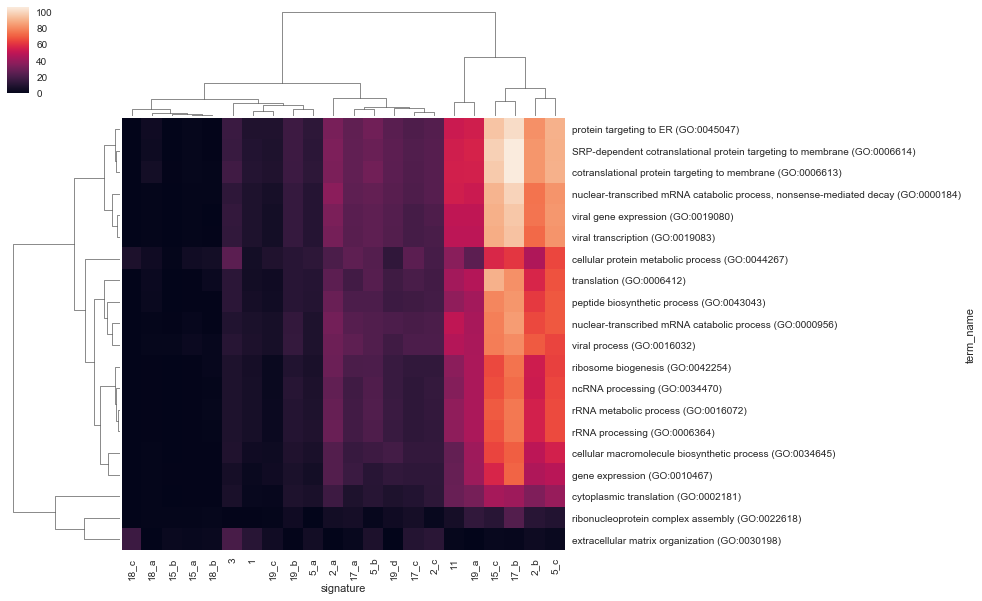

In [11]:
sns.clustermap(plot_df.loc[top_terms])

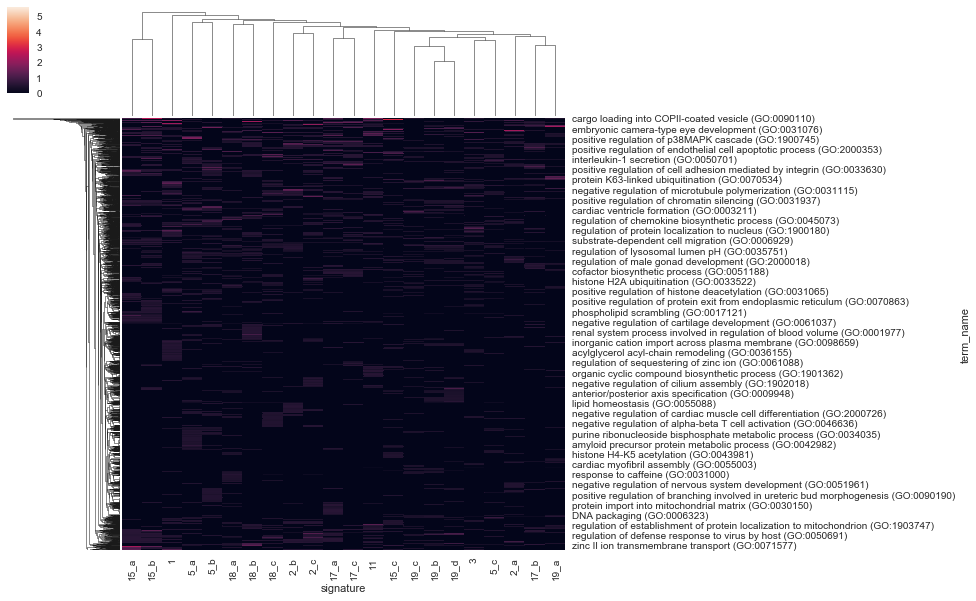

In [310]:
sns.clustermap(fdrs_filtered)

In [297]:
fdrs_filtered.to_csv(outfile, sep='\t')

In [279]:
from IPython.display import HTML, display
# to display hyperlink as <a> tag in output cells
def display_link(url):
    raw_html = '<a href="%s" target="_blank">%s</a>' % (url, url)
    return display(HTML(raw_html))

In [ ]:
clustergrammer_url = 'http://amp.pharm.mssm.edu/clustergrammer/matrix_upload/'
r = requests.post(clustergrammer_url, files={'file': open(, 'rb')})
link = r.text
display_link(link)

In [ ]:
# filter table by FDR value 

In [348]:
atc = df['term_name'].value_counts()
atc [:100]

NameError: name 'value_counts' is not defined

In [234]:
c = Counter()
for i in [enr_res[signature]['top'] for signature in enr_res.keys()]:
    c.update(i['term_name'].iloc[:5])

In [235]:
c.most_common()

[('protein targeting to ER (GO:0045047)', 17),
 ('SRP-dependent cotranslational protein targeting to membrane (GO:0006614)',
  17),
 ('nuclear-transcribed mRNA catabolic process, nonsense-mediated decay (GO:0000184)',
  17),
 ('viral transcription (GO:0019083)', 13),
 ('peptide biosynthetic process (GO:0043043)', 8),
 ('viral process (GO:0016032)', 5),
 ('neutrophil degranulation (GO:0043312)', 4),
 ('extracellular matrix organization (GO:0030198)', 3),
 ('neutrophil mediated immunity (GO:0002446)', 3),
 ('regulated exocytosis (GO:0045055)', 2),
 ('platelet degranulation (GO:0002576)', 2),
 ('rRNA metabolic process (GO:0016072)', 2),
 ('mitochondrial ATP synthesis coupled proton transport (GO:0042776)', 1),
 ('ribosomal small subunit export from nucleus (GO:0000056)', 1),
 ('positive regulation of nitric oxide biosynthetic process (GO:0045429)', 1),
 ('positive regulation of nitric oxide metabolic process (GO:1904407)', 1),
 ('ER to Golgi vesicle-mediated transport (GO:0006888)', 1),
 

In [ ]:
c = Counter()
for i in [results[signature]['top'] for signature in results.keys()]
for i in [results['1']['top']]: 
    c.update(i['Term name'].iloc[:5])
[results[signature]['top'] for signature in results.keys()]

In [176]:
# Create a 3rd dictionary 
from collections import defaultdict
results = defaultdict(dict)
# Iterate through dictionary, create gene lists and save as 'genes'
for signature in dict_top_genes:
    for direction in ('top', 'bottom'):
        genes = dict_top_genes[signature][direction] # value = dict [1st key] [2nd key]
        results[signature][direction] = enrichr_result_to_df(genes,'','GO_Biological_Process_2018')
        #for signature in list(dict_top_genes.keys())[0]:

# freeze default dict for readonly1
results.default_factory = None

In [201]:
# Number of studies to be processed
n = len(study_names)
i = 0
for study in study_names[:]:
    
df_1_top=pd.DataFrame(results['1']['top'])

In [209]:
# if creating a list instead of dictionary
test = []
for signature in dict_top_genes:
    for direction in ('top', 'bottom'):
        genes = dict_top_genes[signature][direction] # value = dict [1st key] [2nd key]
        genes_df = pd.DataFrame(enrichr_result_to_df(genes,'','GO_Biological_Process_2018'))
        #specify names of each geneset (which study and top/bottom they are from)
        test.append([signature, direction, genes_df])

In [ ]:
for study, d1 in D.items():
    for top, v in d1.items():
wanted_keys = dict_df.columns.get_values().tolist() # The keys you want
dict((k, results[k]) for k in wanted_keys if k in results)    

In [ ]:
c = Counter()
for df_ in [df, df2]: 
    c.update(df_['Term name'].iloc[:5])